2. What are convolutions?
A convolution is a filter that passes over an image, processes it, and extracts the important features.

Let's say you have an image of a person wearing a sneaker. How would you detect that a sneaker is present in the image? In order for your program to "see" the image as a sneaker, you'll have to extract the important features, and blur the inessential features. This is called feature mapping.

The feature mapping process is theoretically simple. You'll scan every pixel in the image and then look at its neighboring pixels. You multiply the values of those pixels by the equivalent weights in a filter.

For example:
https://developers.google.com/static/codelabs/tensorflow-3-convolutions/img/f7b0ab29e09a51f_960.png

Convolution on image

In this case, a 3x3 convolution matrix, or image kernel, is specified.

The current pixel value is 192. You can calculate the value of the new pixel by looking at the neighbor values, multiplying them by the values specified in the filter, and making the new pixel value the final amount.

Now it's time to explore how convolutions work by creating a basic convolution on a 2D grayscale image.

You'll demonstrate that with the ascent image from SciPy. It's a nice built-in picture with lots of angles and lines.

In [2]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

/tmp/ipykernel_542119/3365291586.py:4: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  i = misc.ascent()


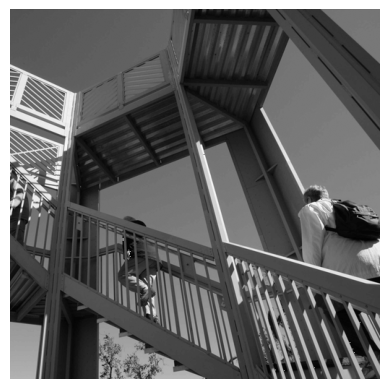

In [4]:
# use the Pyplot library matplotlib to draw the image so that you know what it looks like:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

You can see that it's an image of a stairwell. There are lots of features you can try and isolate. For example, there are strong vertical lines.

The image is stored as a NumPy array, so we can create the transformed image by just copying that array. The size_x and size_y variables will hold the dimensions of the image so you can loop over it later.

In [5]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

4. Create the convolution matrix
First, make a convolution matrix (or kernel) as a 3x3 array:

In [6]:
# This filter detects edges nicely
# It creates a filter that only passes through sharp edges and straight lines. 
# Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]] 
# A couple more filters to try for fun!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
 # If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

Now, calculate the output pixels. Iterate over the image, leaving a 1-pixel margin, and multiply each of the neighbors of the current pixel by the value defined in the filter.

That means that the current pixel's neighbor above it and to the left of it will be multiplied by the top-left item in the filter. Then, multiply the result by the weight and ensure that the result is in the range 0 through 255.

Finally, load the new value into the transformed image:

In [7]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      output_pixel = 0.0
      output_pixel = output_pixel + (i[x - 1, y-1] * filter[0][0])
      output_pixel = output_pixel + (i[x, y-1] * filter[0][1])
      output_pixel = output_pixel + (i[x + 1, y-1] * filter[0][2])
      output_pixel = output_pixel + (i[x-1, y] * filter[1][0])
      output_pixel = output_pixel + (i[x, y] * filter[1][1])
      output_pixel = output_pixel + (i[x+1, y] * filter[1][2])
      output_pixel = output_pixel + (i[x-1, y+1] * filter[2][0])
      output_pixel = output_pixel + (i[x, y+1] * filter[2][1])
      output_pixel = output_pixel + (i[x+1, y+1] * filter[2][2])
      output_pixel = output_pixel * weight
      if(output_pixel<0):
        output_pixel=0
      if(output_pixel>255):
        output_pixel=255
      i_transformed[x, y] = output_pixel

5. Examine the results
Now, plot the image to see the effect of passing the filter over it:

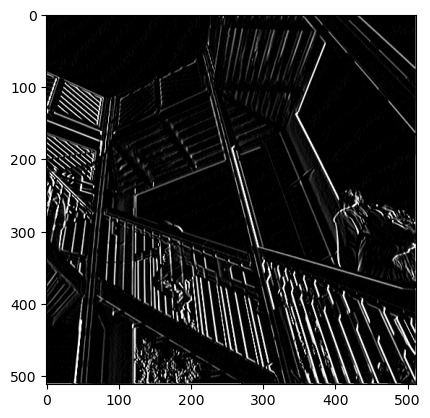

In [8]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()   

Consider the following filter values and their impact on the image.

Using [-1,0,1,-2,0,2,-1,0,1] gives you a very strong set of vertical lines:

Detecting vertical lines filter

Using [-1,-2,-1,0,0,0,1,2,1] gives you horizontal lines:

Detecting horizontal lines

Explore different values! Also, try differently sized filters, such as 5x5 or 7x7.

6. Understanding Pooling
Now that you've identified the essential features of the image, what do you do? How do you use the resulting feature map to classify images?

Similar to convolutions, pooling greatly helps with detecting features. Pooling layers reduce the overall amount of information in an image while maintaining the features that are detected as present.

There are a number of different types of pooling, but you'll use one called Maximum (Max) Pooling.

Iterate over the image and, at each point, consider the pixel and its immediate neighbors to the right, beneath, and right-beneath. Take the largest of those (hence max pooling) and load it into the new image. Thus, the new image will be one-fourth the size of the old.
https://developers.google.com/static/codelabs/tensorflow-3-convolutions/img/6029904d82700d8e_960.png

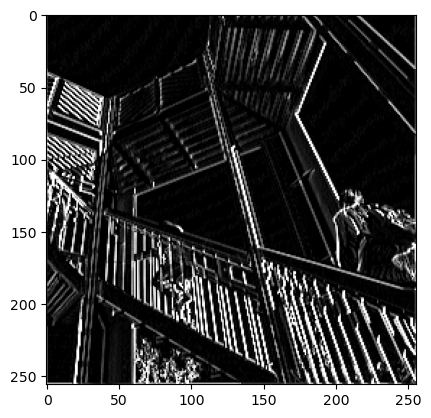

In [9]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]
 
# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()

Note the axes of that plot. The image is now 256x256, one-fourth of its original size, and the detected features have been enhanced despite less data now being in the image.